In [1]:
import os
import pandas as pd
import numpy as np
import torch
#import ToTensor
import torchvision.transforms as transforms
#import for imread
from DataCollectionAndPreparation import *
from skimage import io
import torch.nn as nn
import matplotlib.pyplot as plt

c:\Users\Morteza\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = get_dataset()
X_train , X_test , Y_train , Y_test = DataCollection(dataset,csv_path="../trainLabels.csv")
trainset = list(zip(X_train,Y_train))
testset = list(zip(X_test,Y_test))
trainloader = torch.utils.data.DataLoader(trainset, batch_size=8,shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=8,shuffle=False, num_workers=2)

In [3]:
for x , y in trainloader:
    print(x.shape)
    print(y.shape)
    break

torch.Size([8, 3, 300, 300])
torch.Size([8])


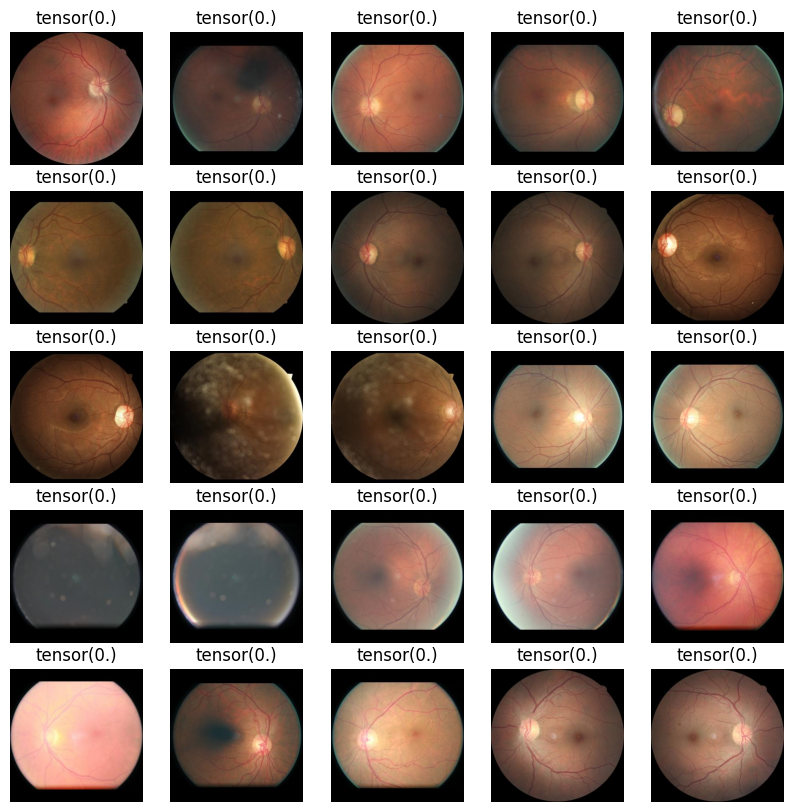

In [3]:
# print 25 sample of images
fig = plt.figure(figsize=(10,10))
for i in range(25):
    ax = fig.add_subplot(5,5,i+1)
    ax.imshow(trainset[i][0].permute(1,2,0))
    ax.set_title(trainset[i][1])
    ax.axis('off')
plt.show()

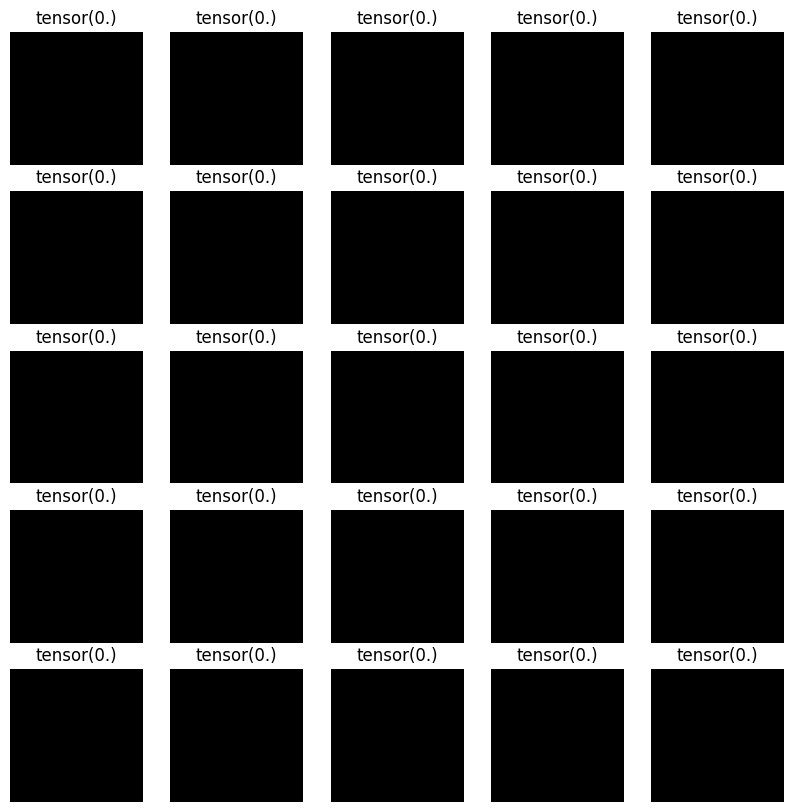

In [4]:
# print 25 sample of test images
fig = plt.figure(figsize=(10,10))
for i in range(25):
    ax = fig.add_subplot(5,5,i+1)
    ax.imshow(X_test[i+1000].permute(1,2,0))
    ax.set_title(Y_test[i+1000])
    ax.axis('off')
plt.show()

In [6]:
from SoftmaxTrainingClassifier import *
from DRFeatureExtraction import *
model = create_pretrained_inceptionV3()
trainer = InceptionV3Trainer(InceptionV3Net=model,trainloader=trainloader,testloader=testloader,epochs=50)

Using cache found in C:\Users\Morteza/.cache\torch\hub\pytorch_vision_v0.10.0
c:\Users\Morteza\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\Morteza\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [7]:
trainer.fit()

Epoch 1 in 230 , Train Accuracy: 88.7%, Avg train loss: 0.385056 , Test Accuracy: 100.0%, Avg test loss: 0.018347 



KeyboardInterrupt: 

In [22]:
from torchsummary import summary
summary(model, (3, 300, 300))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 149, 149]             864
       BatchNorm2d-2         [-1, 32, 149, 149]              64
       BasicConv2d-3         [-1, 32, 149, 149]               0
            Conv2d-4         [-1, 32, 147, 147]           9,216
       BatchNorm2d-5         [-1, 32, 147, 147]              64
       BasicConv2d-6         [-1, 32, 147, 147]               0
            Conv2d-7         [-1, 64, 147, 147]          18,432
       BatchNorm2d-8         [-1, 64, 147, 147]             128
       BasicConv2d-9         [-1, 64, 147, 147]               0
        MaxPool2d-10           [-1, 64, 73, 73]               0
           Conv2d-11           [-1, 80, 73, 73]           5,120
      BatchNorm2d-12           [-1, 80, 73, 73]             160
      BasicConv2d-13           [-1, 80, 73, 73]               0
           Conv2d-14          [-1, 192,